In [42]:
import pandas as pd

In [248]:
df= pd.read_csv("resources/divar_posts_dataset.csv")

In [243]:
samandia = df.loc[df['brand'] == "سمند::Samand"]
samandia = samandia[samandia['price']!=-1]
p89 = (samandia['title'].str.contains(pat='89') | samandia['title'].str.contains(pat='۸۹'))
p90 = (samandia['title'].str.contains(pat='90') | samandia['title'].str.contains(pat='۹۰'))
samand90 = samandia[p90]
samand89 = samandia[p89]
samand89 = samand89.loc[samand89['price']>16000000]
samand90 = samand90.loc[samand90['price']<25000000]
samand90 = samand90.loc[samand90['price']>16000000]
print(samand90.price.describe())
print(samand89.price.describe())

count    3.700000e+02
mean     2.079878e+07
std      1.579387e+06
min      1.620000e+07
25%      2.000000e+07
50%      2.100000e+07
75%      2.200000e+07
max      2.470000e+07
Name: price, dtype: float64
count    1.900000e+02
mean     2.046684e+07
std      1.738912e+06
min      1.690000e+07
25%      1.950000e+07
50%      2.050000e+07
75%      2.150000e+07
max      2.600000e+07
Name: price, dtype: float64


In [328]:
bfarsh = df['cat3'] == "carpets"
farshia = df[bfarsh]
farshia = farshia[(farshia['price']!=-1) & ~(farshia['desc'].str.contains('دستباف'))]

In [329]:
end = farshia[(farshia['created_at'].str.contains('Friday') | farshia['created_at'].str.contains('Thursday '))]
day = farshia[(~(farshia['created_at'].str.contains('Friday') | farshia['created_at'].str.contains('Thursday ')))]
print(end.shape)
print(day.shape)

(5294, 17)
(12911, 17)


In [330]:
print(end.price.describe())
print(day.price.describe())

count    5.294000e+03
mean     5.523218e+05
std      8.649332e+05
min      5.000000e+01
25%      1.200000e+05
50%      3.000000e+05
75%      6.000000e+05
max      1.120000e+07
Name: price, dtype: float64
count    1.291100e+04
mean     5.841163e+05
std      9.208501e+05
min      2.000000e+01
25%      1.200000e+05
50%      3.000000e+05
75%      7.000000e+05
max      1.120000e+07
Name: price, dtype: float64


In [331]:
import matplotlib.pyplot as plt

(array([1.295e+03, 9.430e+02, 6.000e+02, 4.490e+02, 5.210e+02, 2.570e+02,
        1.830e+02, 1.520e+02, 2.590e+02, 5.100e+01, 6.200e+01, 5.200e+01,
        4.500e+01, 8.400e+01, 2.700e+01, 2.200e+01, 3.400e+01, 5.700e+01,
        7.000e+00, 1.200e+01, 1.200e+01, 5.000e+00, 2.400e+01, 1.000e+00,
        1.300e+01, 7.000e+00, 2.200e+01, 0.000e+00, 8.000e+00, 1.000e+00,
        2.000e+00, 9.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 1.200e+01,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 6.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

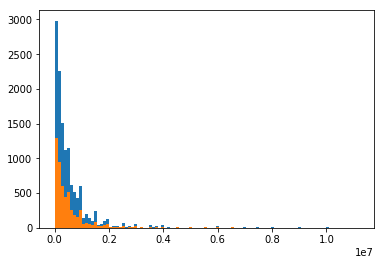

In [332]:
plt.hist(day.price, 100)
plt.hist(end.price, 100)

In [420]:
cars = df[(df['cat2']=='cars') & (df['created_at'].str.contains('06PM'))]
arr = cars.title
arr.shape
arr = arr.str.split(' ')
d = dict()
for l in arr:
    for x in l:
        if (d.get(x) == None):
            d.update({x:1})
        else:
            d.update({x:d.get(x)+1})
D = dict()
for a in d.keys():
    b = d.get(a)
    if (D.get(b) == None):
        D.update({b:[a]})
    else:
        D.update({b:D.get(b)+[a]})
L = list(d.values())
L.sort(reverse=True)
for x in L:
    if (x<100):
        break;
    print(D.get(x))

['مدل']
['پراید']
['پژو']
['رنگ']
['دوگانه']
['خودرو']
['سفید']
['پیکان']
['سمند']
['پارس']
['وانت']
['']
['بدون']
['206']
['ام']
['تمیز']
['405']
['کارخانه']
['تیپ', 'سالم']
['تیپ', 'سالم']
['ای', 'نیسان']
['ای', 'نیسان']
['فروش']
['ال']
['93']
['سوز']
['تیبا', '90']
['تیبا', '90']
['مشکی']
['فول']
['تاکسی']
['دار']
['مدادی']
['بنز', 'صندوق']
['بنز', 'صندوق']


In [476]:
travel = df.loc[(df['cat1']=='leisure-hobbies') & (df['cat2']=='travel-packages')]

In [477]:
travel = travel.loc[(travel.title.str.contains('استانبول') | travel.desc.str.contains('استانبول')) 
                    & (travel.price!=-1) & ~(travel.title.str.contains('دبی')) & ~(travel.title.str.contains('چین'))
                    & ~(travel.title.str.contains('آنتالیا'))  & ~(travel.title.str.contains('تایلند')) & ~(travel.title.str.contains('چين'))
                   & ~(travel.title.str.contains('آداسی')) & ~(travel.title.str.contains('مالزی '))]





In [482]:
travel = travel.loc[(travel.price<1000000) & (travel.price>500000)]

In [484]:
travel.price.describe()

count        84.000000
mean     761452.380952
std       96861.023875
min      600000.000000
25%      690000.000000
50%      745000.000000
75%      818750.000000
max      999000.000000
Name: price, dtype: float64

(array([ 2.,  0.,  0.,  0.,  0.,  4.,  0.,  1.,  0.,  0.,  2.,  0.,  2.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0., 11.,  7.,  1.,  0.,
         0.,  0.,  3.,  0.,  2.,  1.,  3.,  0.,  0.,  1.,  0.,  2.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  7.,  1.,  0.,  6.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,  1.,  2.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]),
 array([600000., 603990., 607980., 611970., 615960., 619950., 623940.,
        627930., 631920., 635910., 639900., 643890., 647880., 651870.,
        655860., 659850., 663840., 667830., 671820., 675810., 679800.,
        683790., 687780., 691770., 695760., 699750., 703740., 707730.,
        711720., 715710., 719700., 723690., 727680., 731670., 735660.,
        739650., 743640., 747630., 751620., 755610., 759600., 763590.,
        

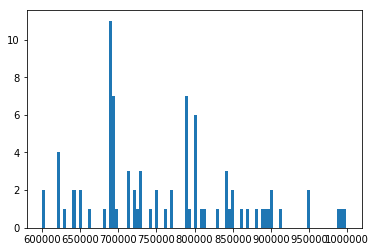

In [485]:
plt.hist(travel.price,100)

In [502]:
c = dict()
for i in range(1,7):
    c.update({i:df.loc[(df['cat2']=='cars') & (df['created_at'].str.contains('0'+str(i)+'PM'))].shape[0]})

In [503]:
c

{1: 8172, 2: 7940, 3: 7784, 4: 8022, 5: 7757, 6: 7623}

In [504]:
for i in range(8,10):
    c.update({i:df.loc[(df['cat2']=='cars') & (df['created_at'].str.contains('0'+str(i)+'AM'))].shape[0]})

In [505]:
c

{1: 8172, 2: 7940, 3: 7784, 4: 8022, 5: 7757, 6: 7623, 8: 6836, 9: 7508}

(7757, 17)